# Real Estate Sales Records in NYC

##### Attached, you will find a dataset, containing real estate sales records in NYC. Using this dataset, we ask that you perform a few tasks and share your work with us. Overall, we expect this project would take 3-6 hours to complete, depending on your preferences and familiarity with the underlying concepts. 
1.	Perform exploratory analysis on this dataset and produce a showcase/storyline of a few interesting patterns and your observations. You will walk us through your findings during our session. You may use any tool you like, but a Jupyter notebook using Python is a common choice. 
2.	Build a simple model (e.g. regression or any type of ML model) that can predict SALE_PRICE of a given case given all the other columns available in the dataset. Feel free to use any techniques and intermediate steps you deem useful in this effort. Analyze your model, its performance/characteristics/diagnostics, any interesting findings (for example, what factors affect prices the most)
Important Note: Please be prepared to discuss the approach in more detail and some ways in which your initial attempt can be further enhanced. In addition to that, please explain/interpret all the things you have done during this project. 
In your project, you may consider doing the following: 
1.	Check for data types, convert if improper data type (e.x., converting date data types)
2.	Explore for missing values, make corrections
3.	Check for outliers
4.	Check if there are any duplicates
5.	Check for logically redundant features
6.	Check for feature scaling
7.	Train different models: Linear regression models, Random Forest regressor, XGBoost regressor
8.	Evaluate your models

About the data: 
You can obtain the data and information about the data from https://www.nyc.gov/site/finance/taxes/glossary-property-sales.page

Borough: The name of the borough in which the property is located.

Neighborhood: Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included.
Building Class Category: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot.

Tax Class at Present: Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
•	Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
•	Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums.
•	Class 3: Includes property with equipment owned by a gas, telephone or electric company.
•	Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.

Block: A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on.

Lot: A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

Easement: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.
Building Class at Present: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings. See NYC Building Classifications.
Address: The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field.

Zip Code: The property’s postal code.

Residential Units: The number of residential units at the listed property.

Commercial Units: The number of commercial units at the listed property.

Total Units: The total number of units at the listed property.

Land Square Feet: The land area of the property listed in square feet.

Gross Square Feet: The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.

Year Built: Year the structure on the property was built.

Building Class at Time of Sale: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class as used by the Department of Finance is interchangeable with the term Building Code as used by the Department of Buildings.

Sales Price: Price paid for the property.

Sale Date: Date the property sold.

$0 Sales Price: A $0 sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a $0 sale including transfers of ownership from parents to children.

### 1.a -Import the libraries:

In [174]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#import warnings
#warnings.filterwarnings("ignore")

### 1.b - Read the data:

In [175]:
df = pd.read_csv("C:\\Users\\ridva\\OneDrive\\Masaüstü\\New folder (2)\\2023 Projects\\nyc-rolling-sales-1.csv", index_col=False)

### 1.c - Explore your data using methods such as head(), describe(), and info(). These methods will show you the first few rows of your data, summary statistics, and information about the data types:

In [176]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [177]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [178]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [179]:
df.shape

(84548, 22)

In [180]:
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [182]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [183]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [184]:
# Splitting up numerical & categorical columns
df_categorical = df.select_dtypes(include='object')
df_numerical = df.select_dtypes(exclude='object')

In [185]:
df_categorical.describe()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548
unique,254,47,11,1,167,67563,3989,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,,D4,131-05 40TH ROAD,,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,84548,12663,210,65496,26252,27612,12989,14561,544


#### 1.d -Check for missing Value

In [186]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [187]:
data1['SALE PRICE'].unique()

array([ 6625000.,  3936272.,  8000000., ...,   408092., 11693337.,
          69300.])

In [188]:
df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ', np.NaN).astype(np.float64)

In [189]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [190]:
df=df[['BOROUGH', 
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'SALE DATE']]

In [191]:
df

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,5,0,5,1633,6440,1900,6625000.0,2017-07-19 00:00:00
1,1,28,3,31,4616,18690,1900,NaN,2016-12-14 00:00:00
2,1,16,1,17,2212,7803,1900,NaN,2016-12-09 00:00:00
3,1,10,0,10,2272,6794,1913,3936272.0,2016-09-23 00:00:00
4,1,6,0,6,2369,4615,1900,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...
84543,5,2,0,2,2400,2575,1998,450000.0,2016-11-28 00:00:00
84544,5,2,0,2,2498,2377,1998,550000.0,2017-04-21 00:00:00
84545,5,2,0,2,4000,1496,1925,460000.0,2017-07-05 00:00:00
84546,5,0,7,7,208033,64117,2001,11693337.0,2016-12-21 00:00:00


In [192]:
df['SALE PRICE'].head()

0    6625000.0
1          NaN
2          NaN
3    3936272.0
4    8000000.0
Name: SALE PRICE, dtype: float64

In [193]:
df.isna().sum()

BOROUGH                  0
RESIDENTIAL UNITS        0
COMMERCIAL UNITS         0
TOTAL UNITS              0
LAND SQUARE FEET         0
GROSS SQUARE FEET        0
YEAR BUILT               0
SALE PRICE           14561
SALE DATE                0
dtype: int64

In [194]:
df['SALE PRICE'].isna().sum()

14561

In [195]:
data1=df.dropna()

In [196]:
data1.isna().sum()

BOROUGH              0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
TOTAL UNITS          0
LAND SQUARE FEET     0
GROSS SQUARE FEET    0
YEAR BUILT           0
SALE PRICE           0
SALE DATE            0
dtype: int64

In [197]:
data1.shape

(69987, 9)

In [198]:
data1['SALE PRICE'].unique()

array([ 6625000.,  3936272.,  8000000., ...,   408092., 11693337.,
          69300.])

In [199]:
len(data1['SALE PRICE'].unique())

10007

In [200]:
sum(data1.duplicated())

1301

In [201]:
data1 = data1.drop_duplicates()
sum(data1.duplicated())

0

In [202]:
data1.head()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,5,0,5,1633,6440,1900,6625000.0,2017-07-19 00:00:00
3,1,10,0,10,2272,6794,1913,3936272.0,2016-09-23 00:00:00
4,1,6,0,6,2369,4615,1900,8000000.0,2016-11-17 00:00:00
6,1,8,0,8,1750,4226,1920,3192840.0,2016-09-23 00:00:00
9,1,24,0,24,4489,18523,1920,16232000.0,2016-11-07 00:00:00


#### Column "BOROUGH" represented as numeric and this is less readable, we'll add a new column of "BOROUGH_NAME" with actual names of boroughs.

In [203]:
data1['BOROUGH_NAME'] = data1['BOROUGH'].astype(str)
data1['BOROUGH_NAME'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
data1.head()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,5,0,5,1633,6440,1900,6625000.0,2017-07-19 00:00:00,Manhattan
3,1,10,0,10,2272,6794,1913,3936272.0,2016-09-23 00:00:00,Manhattan
4,1,6,0,6,2369,4615,1900,8000000.0,2016-11-17 00:00:00,Manhattan
6,1,8,0,8,1750,4226,1920,3192840.0,2016-09-23 00:00:00,Manhattan
9,1,24,0,24,4489,18523,1920,16232000.0,2016-11-07 00:00:00,Manhattan


#### I'll add new column with more consice value of sale price in millions of $.

In [204]:
data1['SALE_PRICE_IN_M'] = data1['SALE PRICE'].astype(np.float64) / 1000000
data1.head()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M
0,1,5,0,5,1633,6440,1900,6625000.0,2017-07-19 00:00:00,Manhattan,6.625000
3,1,10,0,10,2272,6794,1913,3936272.0,2016-09-23 00:00:00,Manhattan,3.936272
4,1,6,0,6,2369,4615,1900,8000000.0,2016-11-17 00:00:00,Manhattan,8.000000
6,1,8,0,8,1750,4226,1920,3192840.0,2016-09-23 00:00:00,Manhattan,3.192840
9,1,24,0,24,4489,18523,1920,16232000.0,2016-11-07 00:00:00,Manhattan,16.232000


#### In addition, we'll add column of "YEAR_BUILT" with float values. We'll need it to graphical representaions.

In [205]:
data1['YEAR_BUILT'] = data1['YEAR BUILT'].astype(np.float64)
data1.head()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,YEAR_BUILT
0,1,5,0,5,1633,6440,1900,6625000.0,2017-07-19 00:00:00,Manhattan,6.625000,1900.0
3,1,10,0,10,2272,6794,1913,3936272.0,2016-09-23 00:00:00,Manhattan,3.936272,1913.0
4,1,6,0,6,2369,4615,1900,8000000.0,2016-11-17 00:00:00,Manhattan,8.000000,1900.0
6,1,8,0,8,1750,4226,1920,3192840.0,2016-09-23 00:00:00,Manhattan,3.192840,1920.0
9,1,24,0,24,4489,18523,1920,16232000.0,2016-11-07 00:00:00,Manhattan,16.232000,1920.0


#### The last one change, we'll create categorical column of "SALE_MONTH" which represents month of property sale.

In [206]:
data1['SALE DATE'] = pd.to_datetime(data1['SALE DATE'])
data1['SALE_MONTH']= data1['SALE DATE'].dt.month

data1.head()

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,YEAR_BUILT,SALE_MONTH
0,1,5,0,5,1633,6440,1900,6625000.0,2017-07-19,Manhattan,6.625000,1900.0,7
3,1,10,0,10,2272,6794,1913,3936272.0,2016-09-23,Manhattan,3.936272,1913.0,9
4,1,6,0,6,2369,4615,1900,8000000.0,2016-11-17,Manhattan,8.000000,1900.0,11
6,1,8,0,8,1750,4226,1920,3192840.0,2016-09-23,Manhattan,3.192840,1920.0,9
9,1,24,0,24,4489,18523,1920,16232000.0,2016-11-07,Manhattan,16.232000,1920.0,11


In [207]:
data1.columns

Index(['BOROUGH', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE',
       'SALE DATE', 'BOROUGH_NAME', 'SALE_PRICE_IN_M', 'YEAR_BUILT',
       'SALE_MONTH'],
      dtype='object')

#### Detect outliers using percentile

In [238]:
data1['SALE PRICE']=data1['SALE PRICE'].astype('float64')

IndexError: invalid index to scalar variable.

In [229]:
max_thresold = data1['SALE PRICE'].quantile(0.95)
max_thresold

IndexError: invalid index to scalar variable.

In [230]:
data1[data1['SALE PRICE']>max_thresold]

IndexError: invalid index to scalar variable.

In [231]:
min_thresold = data1['SALE PRICE'].quantile(0.05)
min_thresold

IndexError: invalid index to scalar variable.

In [ ]:
data1[data1['SALE PRICE']<min_thresold]

#### Remove outliers

In [232]:
data1[(data1['SALE PRICE']<max_thresold) & (data1['SALE PRICE']>min_thresold)]

IndexError: invalid index to scalar variable.

#### Let's check correlation level between columns.

In [208]:
corr = data1.corr().abs()
corr

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE,SALE_PRICE_IN_M,YEAR_BUILT,SALE_MONTH
BOROUGH,1.000000,0.016944,0.000638,0.013894,0.110268,0.074849,0.074849,0.110268,0.003966
RESIDENTIAL UNITS,0.016944,1.000000,0.014781,0.837817,0.023954,0.127372,0.127372,0.023954,0.012039
COMMERCIAL UNITS,0.000638,0.014781,1.000000,0.558210,0.004651,0.044521,0.044521,0.004651,0.004066
TOTAL UNITS,0.013894,0.837817,0.558210,1.000000,0.021830,0.130032,0.130032,0.021830,0.012285
YEAR BUILT,0.110268,0.023954,0.004651,0.021830,1.000000,0.005227,0.005227,1.000000,0.001687
SALE PRICE,0.074849,0.127372,0.044521,0.130032,0.005227,1.000000,1.000000,0.005227,0.003487
SALE_PRICE_IN_M,0.074849,0.127372,0.044521,0.130032,0.005227,1.000000,1.000000,0.005227,0.003487
YEAR_BUILT,0.110268,0.023954,0.004651,0.021830,1.000000,0.005227,0.005227,1.000000,0.001687
SALE_MONTH,0.003966,0.012039,0.004066,0.012285,0.001687,0.003487,0.003487,0.001687,1.000000


In [235]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm')

AttributeError: 'numpy.float64' object has no attribute 'corr'

#### We can see that most of columns have a very weak correlation level

#### Now, let's try to see some connections between numeric columns. We'll use pair plot for this:

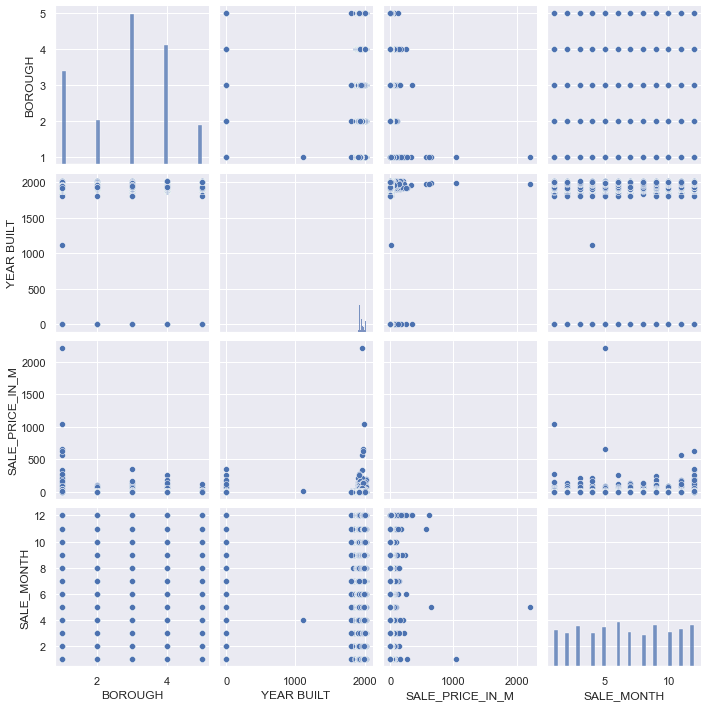

In [209]:
sbs.set()
cols = ['BOROUGH', 'YEAR BUILT', 'SALE_PRICE_IN_M', 'SALE_MONTH']
sbs.pairplot(data1[cols],)
plt.show();

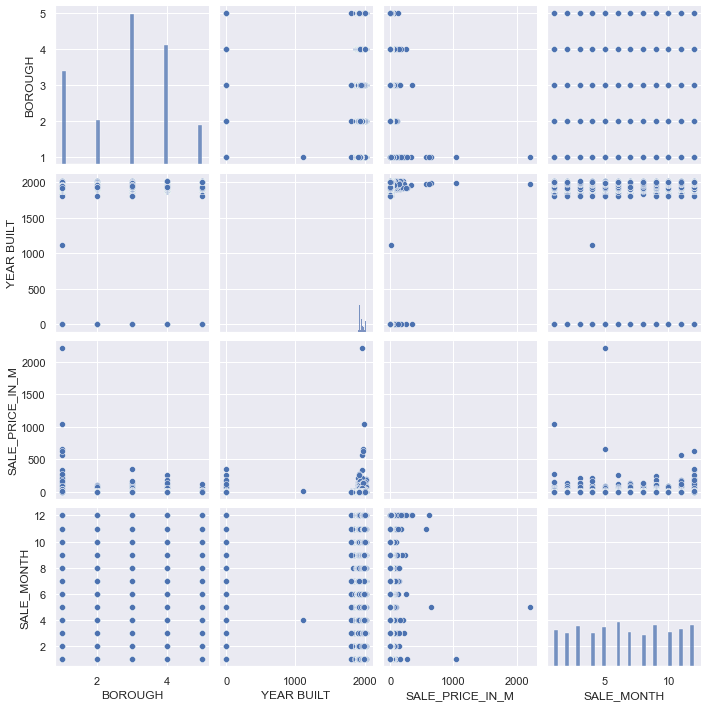

In [211]:
sbs.set()
cols = ['BOROUGH', 'YEAR BUILT', 'SALE_PRICE_IN_M', 'SALE_MONTH']
sbs.pairplot(data1[cols],)
plt.show();

#### Now, we can see some kind connections, price in millions vs. year when property was built.

#### 1.e - Visualize your data using various plots. For example, you can use histograms to explore the distribution of a numerical variable:

# Analysis

# First, we'll see how many proeperties sold by Boroughs. We'll see that most properties was sold in Brooklyn and Queens.

In [233]:
data1['SALE_PRICE_IN_M'].groupby(data1['BOROUGH_NAME']).count().plot.bar()
plt.title("Borough by property's sales amount")

IndexError: invalid index to scalar variable.

# Now, we gonna see where properties are more expensive. Not suprasignly - Manhattan.

In [234]:
data1['SALE_PRICE_IN_M'].groupby(data1['BOROUGH_NAME']).mean().plot.bar()
plt.title("Borough by property's average price (in M)")

IndexError: invalid index to scalar variable.

In [ ]:
So, let's finf out which of neighborhoods in Manhattan are most expensive. And the Oscar goes... to Midtown!!

In [ ]:
manhattan_sales = data1[data1['BOROUGH_NAME'] == 'Manhattan']
manhattan_sales['SALE_PRICE_IN_M'].groupby(manhattan_sales['NEIGHBORHOOD']).mean().plot.bar(figsize=(15, 10))
plt.title("Properties avg price($M) in Manhattan ")

In [ ]:
Now, we want to show connection between month of the deal and the price (in $M). But let's prepare the data first.

In [ ]:
First, we prepare dataset of average price in neighborhoods in Manhattan and take 5 most expensive.

In [ ]:
avg_price = manhattan_sales[['SALE_PRICE_IN_M']].groupby(manhattan_sales['NEIGHBORHOOD']).mean()
avg_price = avg_price.sort_values(by='SALE_PRICE_IN_M', ascending=False)
top_avg_price = avg_price.head(5)

In [ ]:
Now, we'll break out multilevel index for a single level.

In [ ]:
top_5_neighborhoods = top_avg_price.index.values

top_5 = data1[data1['NEIGHBORHOOD'].isin(top_5_neighborhoods)]

t = top_5[['NEIGHBORHOOD','SALE_PRICE_IN_M', 'SALE_MONTH']] 
t = t.groupby(['NEIGHBORHOOD','SALE_MONTH'])[['SALE_PRICE_IN_M']].count()

t = t.reset_index(level=1)
t = t.reset_index(level=0)
t

In [ ]:
At last, let's draw the chart

In [ ]:
ax = sbs.relplot(x="SALE_MONTH", y="SALE_PRICE_IN_M", hue="NEIGHBORHOOD", size="SALE_PRICE_IN_M",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=t)
ax.set(ylabel="SALE_PRICE_IN_M")
plt.show()

In [ ]:
The last connection we want to observe - property price (in $M) vs year of when property was built.

In [ ]:
year_built_vs_price = data1[['YEAR BUILT', 'SALE_PRICE_IN_M']]
year_built_vs_price = year_built_vs_price[(year_built_vs_price['YEAR BUILT'] > 1800) & (year_built_vs_price['YEAR BUILT'] < 2023)].groupby('YEAR BUILT')[['SALE_PRICE_IN_M']].mean()
year_built_vs_price = year_built_vs_price.reset_index(level=0)

ax = sbs.histplot(year_built_vs_price['YEAR BUILT'], kde=True)
ax.set(ylabel="SALE_PRICE_IN_M")
plt.show()

### 7.	Train Split/Test

#### To train different models on your data, you first need to split your data into training and testing sets. This allows you to train the models on one set of data and evaluate their performance on another set of data that they have not seen before. Here's some sample code to split your data into a training set and a testing set:

In [237]:
Y = data1['SALE PRICE']
X = data1.drop('SALE PRICE', axis=1)

X.shape , Y.shape

IndexError: invalid index to scalar variable.

#### This will split your data into a training set (70% of the data) and a testing set (30% of the data).

Next, you can train different models on the training set and evaluate their performance on the testing set. Here's some sample code to train a linear regression model:

In [ ]:
X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state =34)

In [ ]:
# Training set
X_train.shape , Y_train.shape

### 8.	Evaluate your models:Linear regression models, Random Forest regressor, XGBoost regressor

# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
Ridge

In [ ]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
rmse(Y_test,Y_pred_ridge)

In [ ]:
# Check the MAE score of the model
print(f'Ridge MAE score on the X_test is: {mean_absolute_error(Y_test, Y_pred_ridge)}')

#### Random forest regression

In [ ]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse(Y_test,Y_pred_rf)

In [ ]:
# Check the MAE score of the model
print(f'Random Forest MAE score on the X_test is: {mean_absolute_error(Y_test, Y_pred_rf)}')

In [ ]:
print(f'Random forest Mean squared error score on the X_test is: {mean_squared_error(Y_test, Y_pred_rf)}')

In [ ]:
XGBR

In [ ]:
import xgboost as xgb

# Train model
model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.65, learning_rate = 0.2,
                max_depth = 10, alpha = 10, n_estimators = 50)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(Y_test, y_pred)}')

In [ ]:
rmse(Y_test,y_pred)

In [ ]:
print(f'XGBRegressor Mean squared error score on the X_test is: {mean_squared_error(Y_test, y_pred)}')

In [ ]:
Pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm

import time

In [ ]:
# Popular Regression Algorithms

lm = LinearRegression()
lgbm = lightgbm.LGBMRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

In [ ]:
algo = [xgbt,lgbm,lm,ridge,lasso,knn,rf,dtree,mlp]
result = []

for i in algo:
        start = time.process_time()
        model = i.fit(X_train,Y_train)
        result.append([str(i).split("(")[0] + str("_processed"), model.score(X_train, Y_train), model.score(X_test, Y_test),
                  np.sqrt(mean_squared_error(Y_train, model.predict(X_train))),
                  np.sqrt(mean_squared_error(Y_test, model.predict(X_test))),
                  mean_absolute_error(Y_train, model.predict(X_train)),
                  mean_absolute_error(Y_test, model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(time.process_time()-start),"sec")
        
MODELS = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")

In [ ]:
MODELS.head(2)

In [ ]:
Y_test.describe()

In [ ]:
Normalized RMSE = RMSE / (max value – min value) This produces a value between 0 and 1, where values closer to 0 represent better fitting models.

In [ ]:
#XGBREG
0.559565/(2.780610+2.837707)
# Normalized RMSE is close to 0 so it's a good model

In [ ]:
xgboot paramaters tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgbt,
            param_distributions=hyperparameter_grid,
            cv=2, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,Y_train)

random_cv.best_estimator_